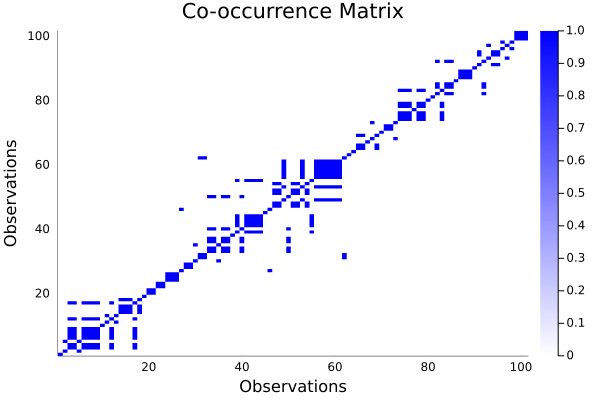

In [13]:
include("../ntl.jl")
import Random

using LinearAlgebra
Random.seed!(1)

data_parameters = Ntl.Models.FiniteTopicModelParameters(num_topics=10, num_words=100, length=10, topic_parameter=0.01, word_parameter=0.1)

psi_prior = Vector{Float64}([1, 1])
phi_prior = Vector{Float64}([1, 1])
geometric_arrival = Ntl.Models.GeometricArrivals(phi_prior)
ntl_cluster_parameters = Ntl.Models.NtlParameters(psi_prior, geometric_arrival)

mixture_model = Ntl.Models.Mixture(ntl_cluster_parameters, data_parameters)
n = 100
mixture = Ntl.Generate.generate(mixture_model, n=n+1)
data = Matrix(mixture[:, 2:end])
data = Matrix(transpose(data))
training_data = data[:, 1:n]
test_datum = vec(data[:, n+1])
true_clustering = mixture[:, 1]
Ntl.Plot.plot_assignments(true_clustering)
Ntl.Plot.plot_co_occurrence_matrix(true_clustering)

Progress: 100%|█████████████████████████████████████████| Time: 0:01:06


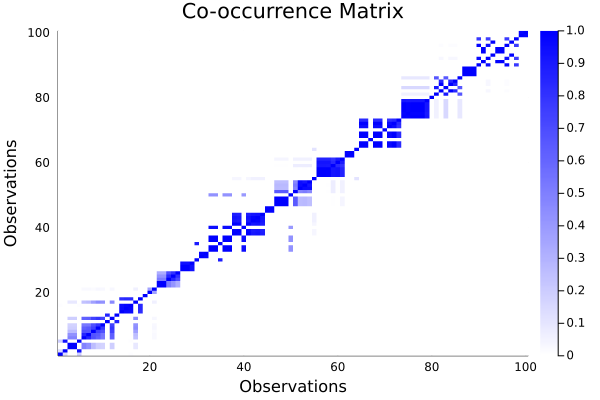

In [14]:
metropolis_hastings_sampler = Ntl.Samplers.MetropolisHastingsSampler(num_iterations=1000, num_burn_in=10000, cluster_radius=100, observation_window=100)
(metropolis_hastings_instances, log_likelihoods) = Ntl.Fitter.fit(training_data, mixture_model, metropolis_hastings_sampler) 
Ntl.Plot.plot_co_occurrence_matrix(metropolis_hastings_instances)

In [39]:
using DataFrames
using CSV
using TextAnalysis

joes_tweets = DataFrame(CSV.File("../data/JoeBidenTweets.csv"))[:, "tweet"]
joes_tweets = joes_tweets[end-199:end]
joes_tweets = [StringDocument(tweet) for tweet in joes_tweets]

for tweet in joes_tweets
    remove_corrupt_utf8!(tweet)
    remove_case!(tweet)
    prepare!(tweet, strip_articles| strip_indefinite_articles| strip_definite_articles)
    prepare!(tweet, strip_prepositions| strip_pronouns| strip_stopwords| strip_numbers| strip_non_letters)
    prepare!(tweet, strip_html_tags| strip_frequent_terms| strip_sparse_terms)
    stem!(tweet)
end

joes_tweets = [tokens(tweet) for tweet in joes_tweets]
#joes_tweets = [filter(e->!startswith(e, "https"), tweet) for tweet in joes_tweets]


["don", "countri", "term", "blue", "red", "unit"]
["malarkey"]
["famili", "famili", "famili", "re", "middleclass", "famili", "re", "hurt", "bad"]
["releas", "tax", "return", "look", "donald", "trump", "hide"]
["ve", "wait", "presid", "trump", "reveal", "grand", "plan", "health", "care", "ve", "laid", "exact", "ll", "look"]
["confus", "guy", "doesn", "run", "run", "joe", "biden"]
["donald", "trump", "park", "avenu", "wall", "street", "economi", "dow", "jone", "believ", "presid", "american", "live", "stock", "market"]
["isn", "donald", "trump", "famili", "famili", "famili", "famili", "america", "hurt", "donald", "trump", "talk"]
["call", "bidencar"]
["equal", "justic", "american", "creed", "live", "ve", "stop", "tri", "presid"]
["charact", "countri", "ballot", "look", "close"]
["donald", "trump", "dog", "whistl", "foghorn"]
["kid", "rip", "parent", "arm", "parent", "kid", "crimin"]
["institut", "racism", "america", "fair", "shot"]
["donald", "trump", "charact", "countri", "ballot"]
["don